<a href="https://colab.research.google.com/github/ObidenceNcube/Closing_Stock_Price_Prediction_LSTM/blob/main/Closing_Stock_Price_Prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description : This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#               to predict the closing stock price of a corporation Apple Inc. using the past 60 day stock price.

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas_datareader

In [ ]:
# Import the libraries
import math
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540045
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607439
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747405
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880668
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860235
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.426826
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.596100
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.501350


# New Section

In [ ]:
# get number of rows
df.shape

(2003, 6)

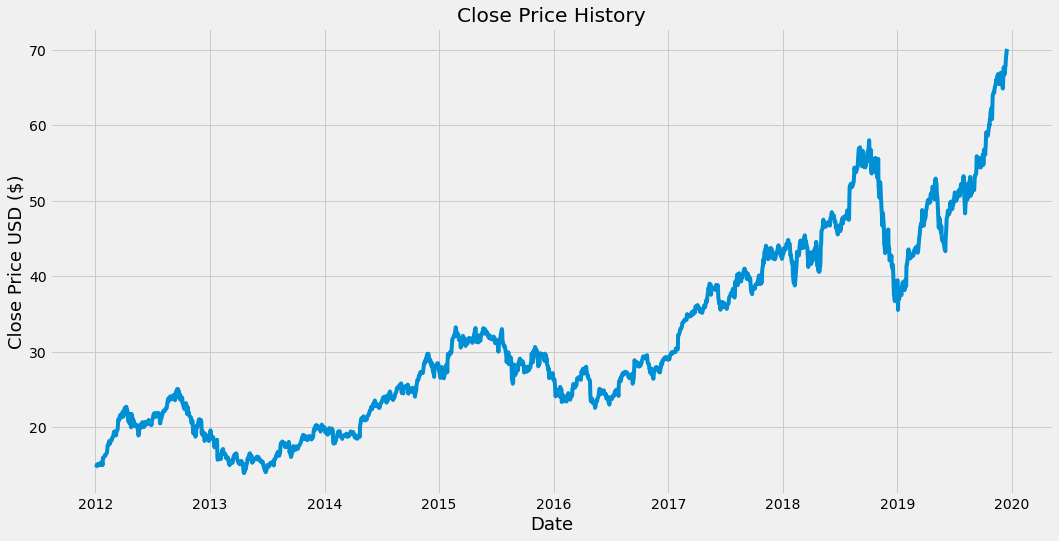

In [ ]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [ ]:
#create a new dataframe with only close column
data=df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

1603

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [ ]:
#create the training data set
#create the scaled training data set
train_data=scaled_data[0:training_data_len, :]
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [ ]:
#convert the x_train and y_train to numpy
x_train, y_train=np.array(x_train), np.array(y_train)


In [ ]:
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [ ]:
#build thelstm model
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
#compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#train model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 65s 37ms/step - loss: 6.1526e-04


In [ ]:
#create the testing dataset
#create newarray containing scaled values
test_data=scaled_data[training_data_len-60:, :]
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [ ]:
#convert data to numpy array
x_test=np.array(x_test)

In [ ]:
#reshape data
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#get the model predicted values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

13/13 [==============================] - 2s 29ms/step


In [ ]:
#get the root mean squared error rmse
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.16126491546630858

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


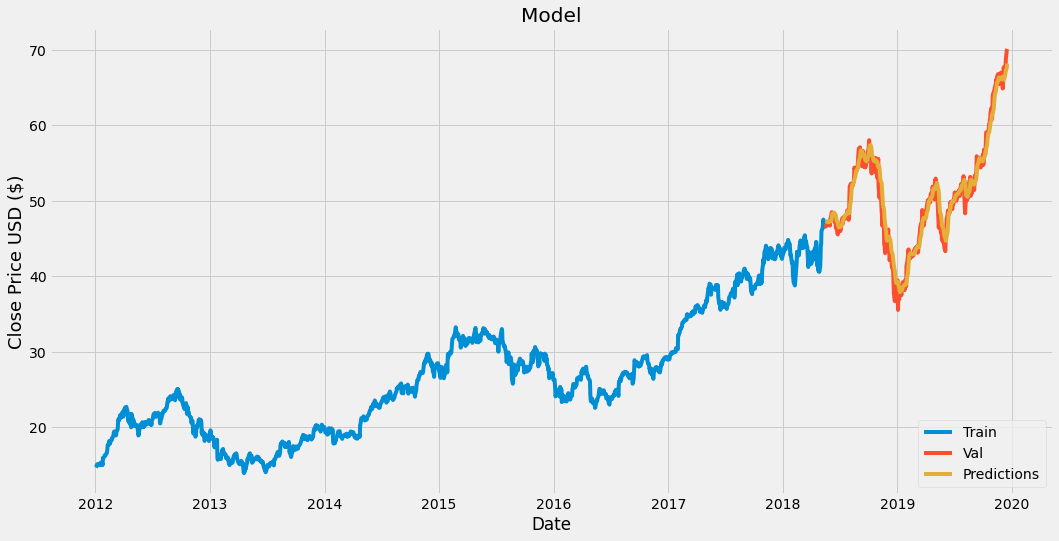

In [ ]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# show valid and predicted
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,47.370106
2018-05-18,46.577499,47.348766
2018-05-21,46.907501,47.266121
2018-05-22,46.790001,47.214283
2018-05-23,47.090000,47.164478
...,...,...
2019-12-11,67.692497,66.690231
2019-12-12,67.864998,66.960381
2019-12-13,68.787498,67.238693


In [ ]:
#get quote
apple_quote=web.DataReader('AAPL',data_source='yahoo', start='2012-01-01', end='2019-12-17')
new_df=apple_quote.filter(['Close'])
last_60_days=new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
x_test=[]
x_test.append(last_60_days_scaled)
x_test=np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
pred_price=model.predict(x_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 25ms/step
[[68.72036]]


In [ ]:
apple_quote2=web.DataReader('AAPL', data_source='yahoo', start='2021-12-18', end='2022-10-18')
print(apple_quote2['Close'])

Date
2021-12-20    169.750000
2021-12-21    172.990005
2021-12-22    175.639999
2021-12-23    176.279999
2021-12-27    180.330002
                 ...    
2022-10-12    138.339996
2022-10-13    142.990005
2022-10-14    138.380005
2022-10-17    142.410004
2022-10-18    143.750000
Name: Close, Length: 209, dtype: float64
